In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/clean_snacks.csv")

In [3]:
df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_discount,sale_devolution
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,324,0,"-32,675.40",0
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,36,0,"-4,437.40",0
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,73200,0,"-20,069.98",0
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,1080,0,"-108,918.43",0
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,TRADICIONAL,NaN,NaN,Superficies Menores,1/04/2014,100,40,"-10,992.00","-29,312.00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213721 entries, 0 to 1213720
Data columns (total 19 columns):
country_region            1213721 non-null object
office_department_city    1213721 non-null object
description               1202509 non-null object
warehouse_city            1150952 non-null object
category_name             1112291 non-null object
brand_id                  1213721 non-null object
price_type                1213721 non-null object
product_id                1213721 non-null int64
plant                     1213721 non-null object
client_id                 1213721 non-null int64
flavor_name               1213721 non-null object
client_name               323679 non-null object
point_of_sale_name        323679 non-null object
distributor               1213721 non-null object
date                      1213721 non-null object
units                     1213721 non-null int64
devolution_units          1213721 non-null int64
sale_discount             1213721 non-null 

In [4]:
df.isna().sum()

country_region                 0
office_department_city         0
description                11212
warehouse_city             62769
category_name             101430
brand_id                       0
price_type                     0
product_id                     0
plant                          0
client_id                      0
flavor_name                    0
client_name               890042
point_of_sale_name        890042
distributor                    0
date                           0
units                          0
devolution_units               0
sale_discount                  0
sale_devolution                0
dtype: int64

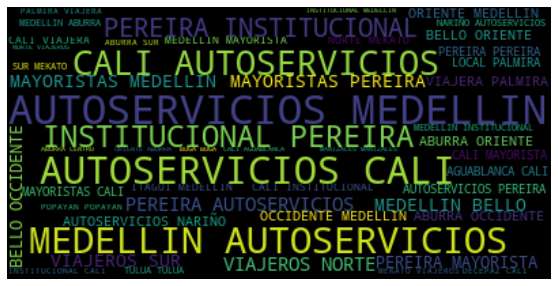

In [5]:
text = ' '.join(df["description"].dropna())
wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="black").generate(text)
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

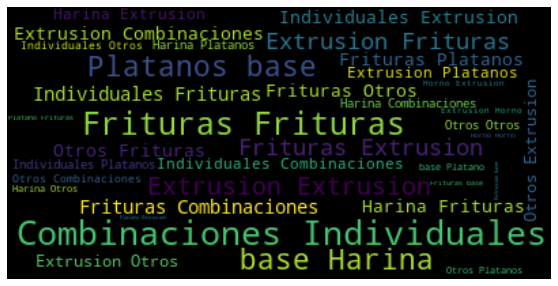

In [6]:
categories = df["category_name"].dropna().values
text = ' '.join(categories).replace("Producto", "").replace("de", "").replace("en", "")
wordcloud = WordCloud(max_font_size=60, max_words=200, background_color="black").generate(text)
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.sort_values(by='date')
df['month_year'] = df['date'].apply(lambda x: x.strftime("%Y-%m"))
df = df[df["office_department_city"] != "No Aplica"]

In [5]:
def stackbar(x, y, kind=None, top=None):
    sns.set_style("dark")
    crosstab = pd.crosstab(df[x], df[y])
    if kind:
        for categories, data in df.groupby([x, y]):
            a, b = categories
            crosstab.loc[a, b] = data[kind].sum()

        crosstab = crosstab.loc[:, df[y].value_counts().index[:top]]
        
    plt_prop = crosstab.plot(kind='bar', stacked=True, width=1, figsize=(12, 6))
    plt_prop.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.grid(axis="y")

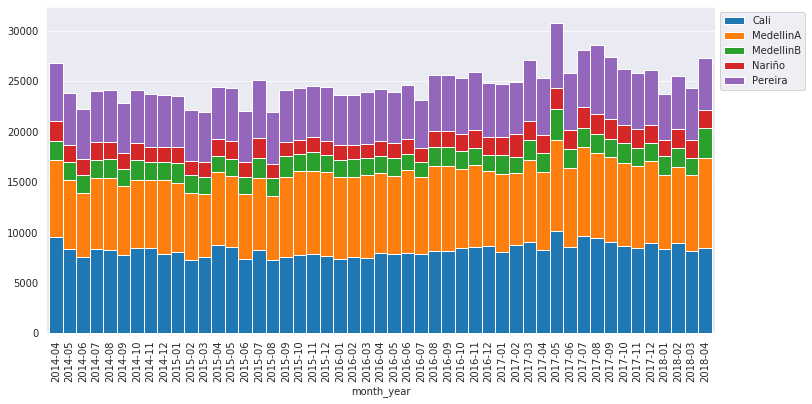

In [6]:
stackbar("month_year", "office_department_city")

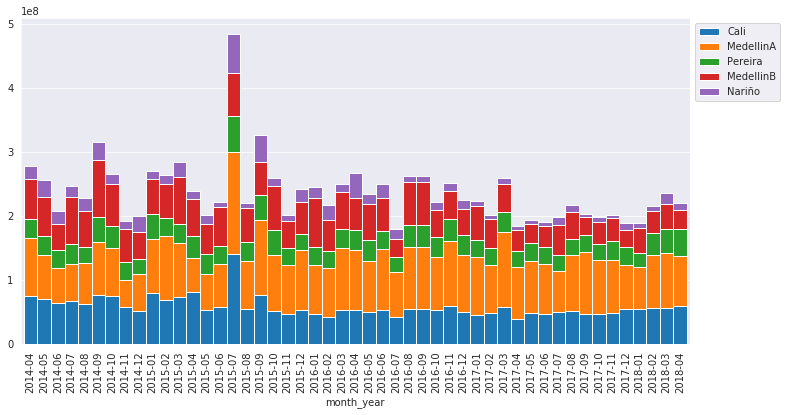

In [7]:
stackbar("month_year", "office_department_city", "units", 5)

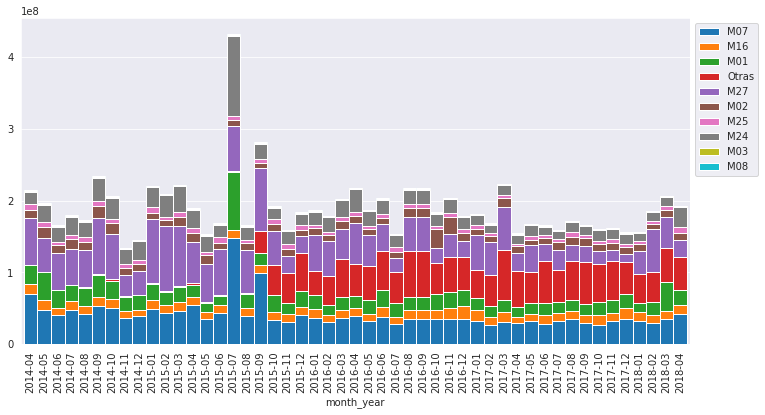

In [10]:
stackbar("month_year", "brand_id", "units", 10)

In [9]:
def stackbar_other(x, y, kind=None, top=None):
    sns.set_style("dark")
    crosstab = pd.crosstab(df[x], df[y])
    if kind:
        for categories, data in df.groupby([x, y]):
            a, b = categories
            crosstab.loc[a, b] = data[kind].sum()

        crosstab = crosstab.loc[:, df[y].value_counts().index[-top:]]
        
    plt_prop = crosstab.plot(kind='bar', stacked=True, width=1, figsize=(12, 6))
    plt_prop.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.grid(axis="y")

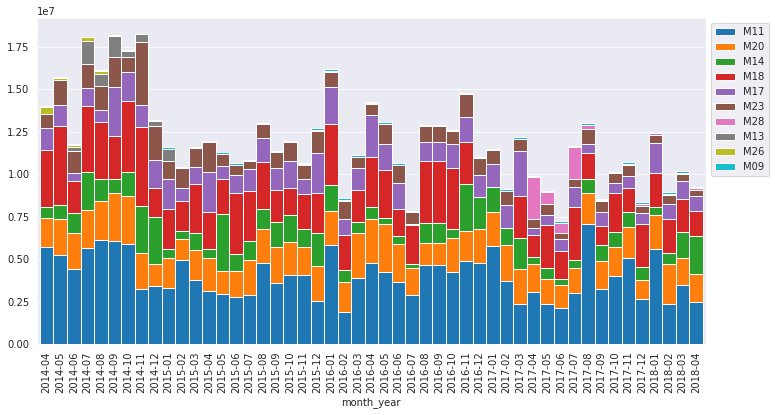

In [11]:
stackbar_other("month_year", "brand_id", "units", 10)

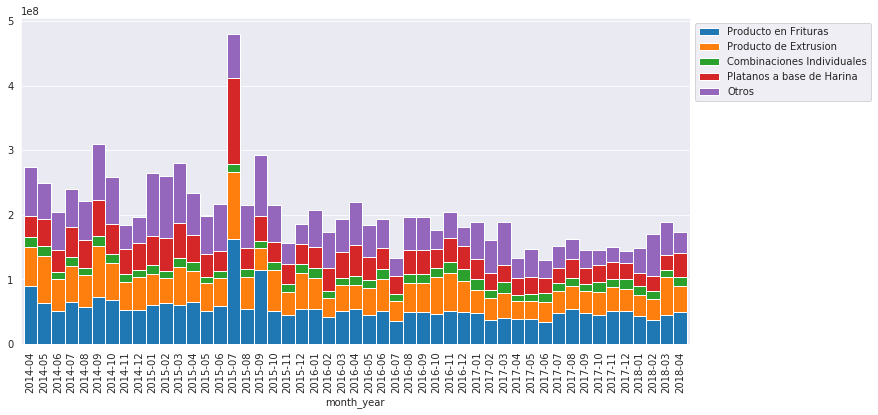

In [12]:
stackbar("month_year", "category_name", "units", 5)

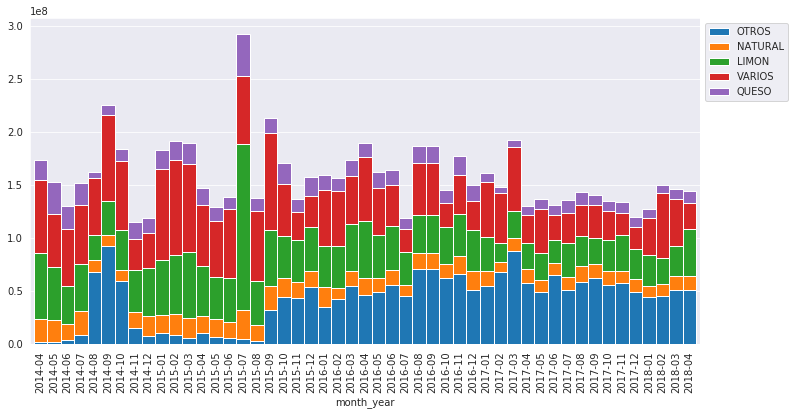

In [19]:
stackbar("month_year", "flavor_name", "units", 5)

In [20]:
df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_discount,sale_devolution,month_year
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,324,0,"-32,675.40",0,2014-04
17892,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Combinaciones Individuales,M16,OFERTADO,53300177,P2,8300116703,LIMON,NaN,NaN,Clientes Droguerias,2014-04-01,1188,0,-494.4,0,2014-04
17891,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Combinaciones Individuales,M16,REGULAR,53407256,P2,8300116703,NATURAL,NaN,NaN,Clientes Droguerias,2014-04-01,1188,0,-494.4,0,2014-04
17890,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Combinaciones Individuales,M16,REGULAR,53407252,P2,9001551071,PARRILLA,CENCOSUD COLOMBIA S.A.,13-JUMBO VALLE DE LILI,Grandes Superficies,2014-04-01,36,0,"-4,449.60",0,2014-04
17889,Sur,Cali,INSTITUCIONAL CALI,NORTE,Combinaciones Individuales,M16,REGULAR,53403018,P2,8901056523,VARIOS,NaN,NaN,Negocios Esp,2014-04-01,3995,0,"-9,518.40",0,2014-04


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

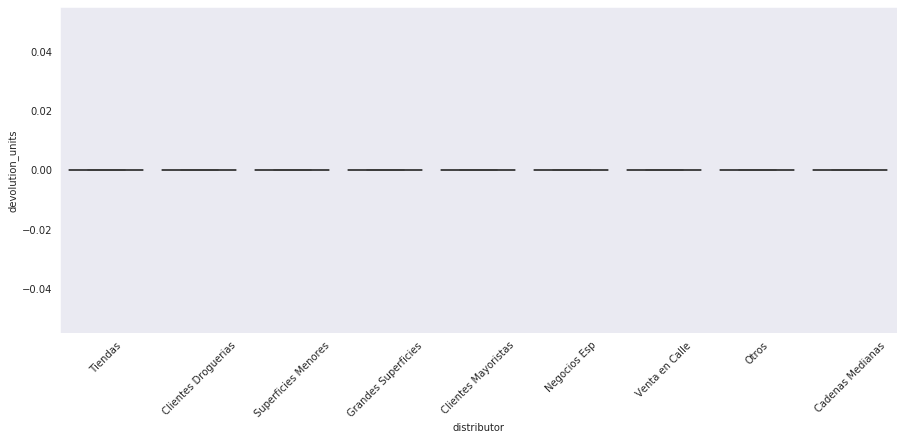

In [27]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="distributor", y="devolution_units", data=df.sample(50000), showfliers=False)
plt.xticks(rotation=45)

In [24]:
df[df['description'].isna()].isna().sum()

country_region                0
office_department_city        0
description               11212
warehouse_city                0
category_name               120
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               11212
point_of_sale_name        11212
distributor                   0
date                          0
units                         0
devolution_units              0
sale_discount                 0
sale_devolution               0
dtype: int64

In [12]:
df[df['warehouse_city'].isna()].isna().sum()

country_region                0
office_department_city        0
description                   0
warehouse_city            62769
category_name             61768
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               28098
point_of_sale_name        28098
distributor                   0
date                          0
units                         0
devolution_units              0
sale_discount                 0
sale_devolution               0
dtype: int64

In [28]:
df['price_type'].unique()

array(['OFERTADO', 'REGULAR'], dtype=object)

In [29]:
df['incentive'] = df['price_type'].apply(lambda x: True if x == 'OFERTADO' else False)

In [30]:
df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_discount,sale_devolution,incentive
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,324,0,"-32,675.40",0,True
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,36,0,"-4,437.40",0,True
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,73200,0,"-20,069.98",0,False
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,1080,0,"-108,918.43",0,True
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,TRADICIONAL,NaN,NaN,Superficies Menores,1/04/2014,100,40,"-10,992.00","-29,312.00",True
